<a href="https://colab.research.google.com/github/Allzer/Neural-networks-on-Python/blob/main/6_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255 #Т.к изображение ЧБ, то после такого преобразование белый - 1, чёрный - 0
x_test = x_test/255

In [32]:
y_train_cat = keras.utils.to_categorical(y_train, 10) #Преобразовали данные в векторы. Там, где нужная цифра по счёту, будет стоять 1
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [55]:
model = keras.Sequential([Flatten(input_shape=(28,28,1)), Dense(200,activation='relu'), Dense(10,activation="softmax")])
print(model.summary())
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 200)               157000    
                                                                 
 dense_7 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159010 (621.13 KB)
Trainable params: 159010 (621.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [56]:
model.fit(x_train, y_train_cat, batch_size=30, epochs=7, validation_split=0.2)

Epoch 1/7
1600/1600 [==============================] - 9s 5ms/step - loss: 0.2534 - accuracy: 0.9267 - val_loss: 0.1321 - val_accuracy: 0.9632
Epoch 2/7
1600/1600 [==============================] - 8s 5ms/step - loss: 0.1071 - accuracy: 0.9688 - val_loss: 0.1151 - val_accuracy: 0.9658
Epoch 3/7
1600/1600 [==============================] - 7s 4ms/step - loss: 0.0727 - accuracy: 0.9775 - val_loss: 0.0940 - val_accuracy: 0.9719
Epoch 4/7
1600/1600 [==============================] - 8s 5ms/step - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.0943 - val_accuracy: 0.9713
Epoch 5/7
1600/1600 [==============================] - 7s 4ms/step - loss: 0.0392 - accuracy: 0.9884 - val_loss: 0.0861 - val_accuracy: 0.9748
Epoch 6/7
1600/1600 [==============================] - 8s 5ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.0788 - val_accuracy: 0.9772
Epoch 7/7
1600/1600 [==============================] - 7s 4ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.0883 - val_accuracy: 0.9750

In [57]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9777


[0.07603572309017181, 0.9776999950408936]

In [ ]:
n = 0
x = np.expand_dims(x_test[n],axis=0) #Создаём 3-мерный тензор
res = model.predict(x)
print(res)
print(f'Распознанная цифра: {np.argmax(res)}') #Выбирает наибольший  индекс

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show

In [60]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[0:20])
print(y_test[:20])

mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[ True  True  True  True  True  True  True  True  True  True]
(223, 28, 28)


Вывод 5 первых неваерных результатов

Значение сети: 9


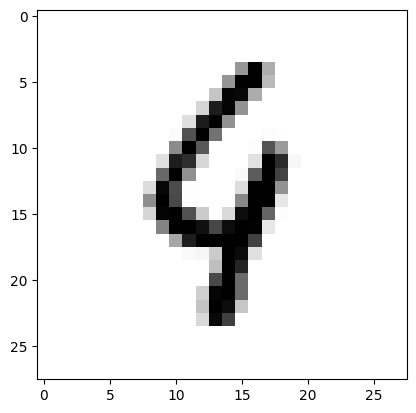

Значение сети: 6


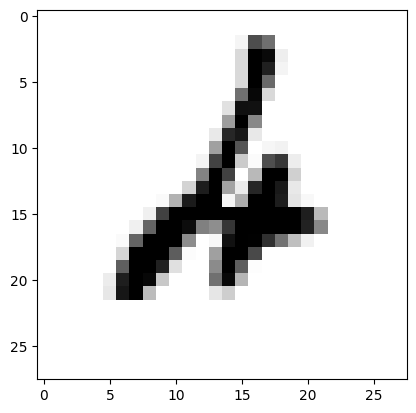

Значение сети: 7


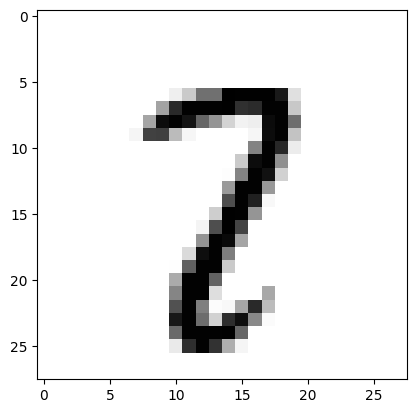

Значение сети: 1


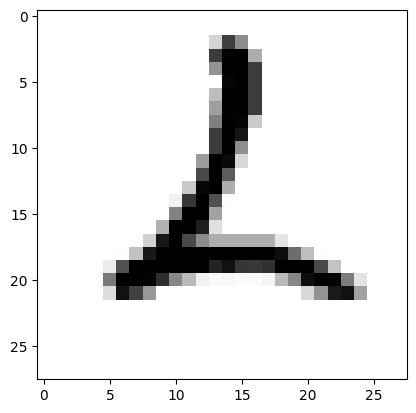

Значение сети: 3


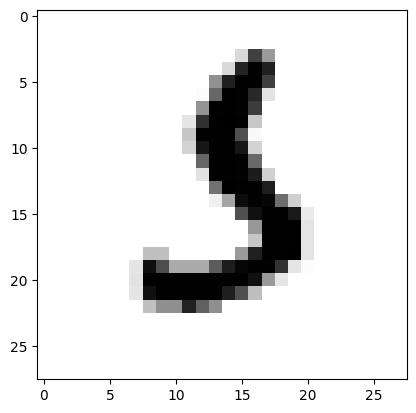

In [61]:
for i in range(5):
  print("Значение сети: "+str(p_false[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()